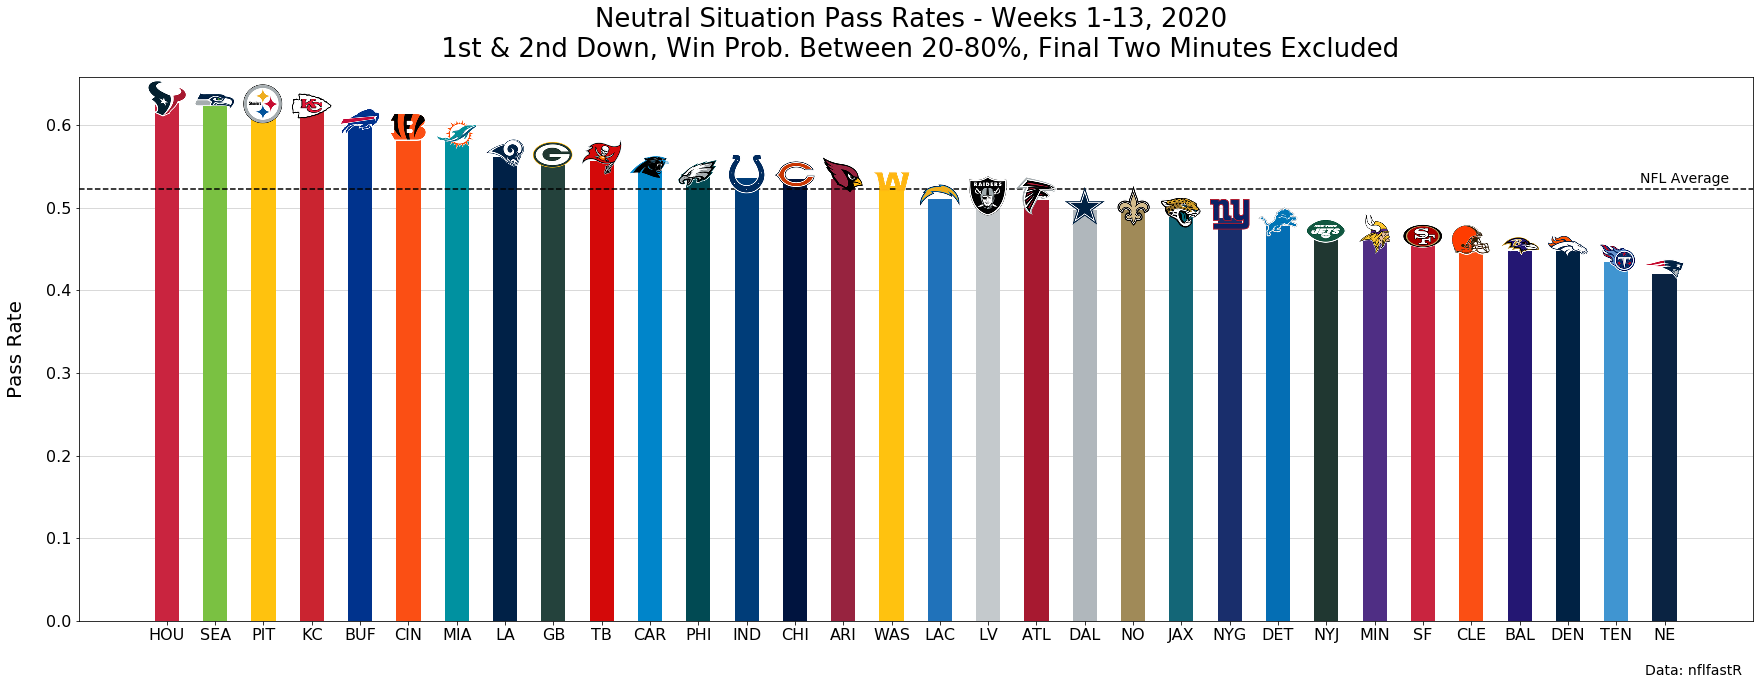

In [3]:
import pandas as pd
import numpy as np
YEAR = 2020
filePath = '/Users/Firefly/Desktop/_iMac_Drive/Joseph/Coding/NFL/Jupyter/'

# Choose whether you want the 'raw_play_by_play' or 'cleaned_play_by_play' data 
#file = 'raw_play_by_play_'
file = 'cleaned_play_by_play_'

# Import data
data = pd.read_csv(filePath + file + str(YEAR) + '.csv.gz', compression='gzip', low_memory=False)

# These two lines set the scroll options so you can scroll vertically and horizontally.
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_columns', 300)

# assign week as a variable that returns the lastest week
minWeek = data['week'].min()
maxWeek = data['week'].max()

data = data.loc[data.season_type=='REG']


import os
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Add logos to the dataframe
def getImage(filePath): 
    return OffsetImage(plt.imread(filePath), zoom=.5)

logos = os.listdir(filePath + 'team_logos')
if '.DS_Store' in logos:
    logos.remove('.DS_Store')

logo_paths = []

for i in logos:
    logo_paths.append(filePath + 'team_logos/' + str(i))
logo_paths.sort()



#Create dataframe of just plays in neutral situations
neutral_situation = data.loc[(data.down<3) & (data.half_seconds_remaining>120) &
                             (data.wp>=.2) & (data.wp<=.8)]
                             
#Get neutral situation pass rate
teams = neutral_situation.groupby('posteam')[['pass']].mean()

# Define colors for each team
COLORS = {'ARI':'#97233F','ATL':'#A71930','BAL':'#241773','BUF':'#00338D','CAR':'#0085CA','CHI':'#00143F',
          'CIN':'#FB4F14','CLE':'#FB4F14','DAL':'#B0B7BC','DEN':'#002244','DET':'#046EB4','GB':'#24423C',
          'HOU':'#C9243F','IND':'#003D79','JAX':'#136677','KC':'#CA2430','LA':'#002147','LAC':'#2072BA',
          'LV':'#C4C9CC','MIA':'#0091A0','MIN':'#4F2E84','NE':'#0A2342','NO':'#A08A58','NYG':'#192E6C',
          'NYJ':'#203731','PHI':'#014A53','PIT':'#FFC20E','SEA':'#7AC142','SF':'#C9243F','TB':'#D40909',
          'TEN':'#4095D1','WAS':'#FFC20F'}

#Add team colors
teams['color'] = COLORS.values()

#Add path column where each row will have the location of the team's logo
teams['path'] = logo_paths

#Sort from highest to lowest pass rate
teams.sort_values('pass',ascending=False,inplace=True)

fig, ax = plt.subplots(figsize=(30,10))

#Add logos
#X data is an array from 0-31 (for 32 teams)
for x0, y0, path in zip(np.arange(0,32),teams['pass']+.005,teams['path']):
    ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False, fontsize=4)
    ax.add_artist(ab)

#Create bar chart, setting color(s) equal to the 32 team color series
ax.bar(np.arange(0,32),teams['pass'],color=teams.color,width=.5)

#Add league average line
ax.axhline(y=teams['pass'].mean(),linestyle='--',color='black')
    
#Add grid
ax.grid(zorder=0,alpha=.6,axis='y')
ax.set_axisbelow(True)

#Set x-ticks labels to be team abbreviations
ax.set_xticks(np.arange(0,32))
ax.set_xticklabels(teams.index,fontsize=16)

#Manually adjust y-axis
ax.set_yticklabels([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7],fontsize=16)

#Set labels and give source
ax.set_ylabel('Pass Rate',fontsize=20,labelpad=20)
ax.set_title('Neutral Situation Pass Rates - Weeks ' + str(minWeek) + '-' + str(maxWeek) + ', ' + str(YEAR) + ' \n 1st & 2nd Down, Win Prob. Between 20-80%, Final Two Minutes Excluded',
             fontsize=26,pad=20)
plt.figtext(.85,.05,'Data: nflfastR',fontsize=14)

#League average line label
plt.text(30.5,.53,'NFL Average',fontsize=14)

plt.savefig('pr.png',dpi=400)
